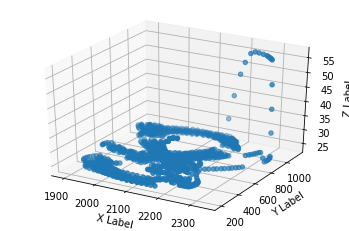

In [3]:
import numpy as np
import networkx as nx
import numpy.random as rnd
import string
import matplotlib.pyplot as plt
from matplotlib import cm

matX = np.genfromtxt('q3dm1-path2.csv',delimiter=',')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX[:,1],matX[:,0],matX[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [21]:
def initRingSOM(matX, k, start=1):
    G = nx.generators.lattice.grid_2d_graph(k, start, periodic=True)
    G = nx.convert_node_labels_to_integers(G)
    m, n = matX.shape
    smpl = rnd.choice(m, k, replace=False)
    for i, v in enumerate(G):
        G.nodes[v]['w'] = matX[smpl[i],:]
    return G

def trainSOM(matX, G, tmax=10000, sigma0=1., eta0=1.):
    # Get size of the matrix
    m, n = matX.shape
    
    # Compute matrix of squared path length 
    # distances between neurons.
    #
    # NOTE: networkx returns a numpy matrix, but we want a numpy array
    # because this allows for easy squaring of its entries
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    
    # A list of tmax random indices
    smpl = rnd.randint(0, m, size=tmax)
    
    for t in range(tmax):
        # Sample a point x
        vecX = matX[smpl[t], :]
        
        # Determine the best matching unit
        b = np.argmin([np.sum((G.nodes[v]["w"] - vecX)**2) for v in G])
        
        # Update the learning rate
        eta = eta0 * (1. - t/tmax)
        
        # Update the topological adaption rate
        sigma = sigma0 * np.exp(-t/tmax)
        
        # Update all weights
        for i, v in enumerate(G):
            # evaluate neighborhood function
            h = np.exp(-0.5 * matD[b,i] / sigma**2)
            G.nodes[v]["w"] += eta * h * (vecX - G.nodes[v]["w"])
    
    return G

In [22]:
G1 = initRingSOM(matX, 10)
G2 = initRingSOM(matX, 10)
G = nx.disjoint_union(G1,G2)
G.add_edge(9,10)

In [25]:
SOM = trainSOM(matX, G,)

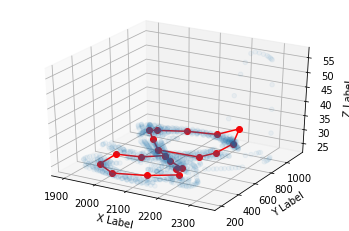

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX[:,1],matX[:,0],matX[:,2], marker='o',alpha=0.05)

neurons = []

neurons.append(SOM.nodes[9]['w'])

for i in range(len(SOM.nodes())):
    neurons.append(SOM.nodes[i]['w'])

neurons.append(SOM.nodes[10]['w'])


neurons = np.array(neurons)

ax.plot(neurons[:,1],neurons[:,0],neurons[:,2],'r-o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()